PDD & Profil Data exported from omnipro

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot PDD data

In [2]:
#pd.read_table('LA6(2015) 6MV 100FSD PDD - RAW.csv', sep= ",").ix[:8]  # view raw

use Energy, Fieldsize, Depth as header

In [3]:
#load_csv = 'LA6(2015) 6MV 100FSD PDD - RAW.csv'
load_csv = 'LA6(2015) 6MV 100FSD PDD - RC edit.csv'  # edited scan type, makes multi-index work
PDD = pd.read_table(load_csv, sep= ",", index_col=0, header=[1,4,5], skiprows=[6]); # comma for csv

In [4]:
PDD.head()

Scan Type:,High,Joined,Low,High,Joined,Low,High,Joined,Low,High,...,Low,High,Joined,Low,High,Joined,Low,High,Joined,Low
Fieldsize:,5 x 5 mm,5 x 5 mm,5 x 5 mm,10 x 10 mm,10 x 10 mm,10 x 10 mm,20 x 20 mm,20 x 20 mm,20 x 20 mm,30 x 30 mm,...,120 x 120 mm,140 x 140 mm,140 x 140 mm,140 x 140 mm,220 x 220 mm,220 x 220 mm,220 x 220 mm,300 x 220 mm,300 x 220 mm,300 x 220 mm
Depth:,-0.5 mm,-0.5 mm,50.0 mm,-0.5 mm,-0.5 mm,50.0 mm,-0.5 mm,-0.5 mm,50.0 mm,-0.5 mm,...,50.0 mm,-0.5 mm,-0.5 mm,50.0 mm,-0.5 mm,-0.5 mm,50.0 mm,-0.5 mm,-0.5 mm,50.0 mm
Coordinate [mm]:,,,,,,,,,,,,,,,,,,,,,
0,69.0,69.0,NaN,57.4,57.4,NaN,53.2,53.2,NaN,53.2,...,NaN,60.8,60.8,NaN,68.3,68.3,NaN,70.5,70.5,NaN
1,68.9,68.9,NaN,57.1,57.1,NaN,53.4,53.4,NaN,53.5,...,NaN,60.7,60.7,NaN,68.5,68.5,NaN,70.7,70.7,NaN
2,75.7,75.6,NaN,70.9,71.0,NaN,65.4,65.5,NaN,64.7,...,NaN,64.9,64.9,NaN,76.3,76.2,NaN,77.0,77.0,NaN
3,101.7,101.8,NaN,87.3,87.3,NaN,80.7,80.7,NaN,79.7,...,NaN,82.4,82.4,NaN,87.5,87.5,NaN,88.8,88.8,NaN
4,113.0,113.0,NaN,99.1,99.1,NaN,91.8,91.8,NaN,90.3,...,NaN,91.7,91.6,NaN,95.4,95.4,NaN,96.3,96.3,NaN


In [5]:
fields = PDD.columns.levels[1]
print(fields)
print(len(fields))

Index(['10 x 10 mm', '100 x 100 mm', '120 x 120 mm', '140 x 140 mm',
       '20 x 20 mm', '220 x 220 mm', '30 x 30 mm', '300 x 220 mm',
       '40 x 40 mm', '5 x 5 mm', '60 x 60 mm', '80 x 80 mm'],
      dtype='object', name='Fieldsize:')
12


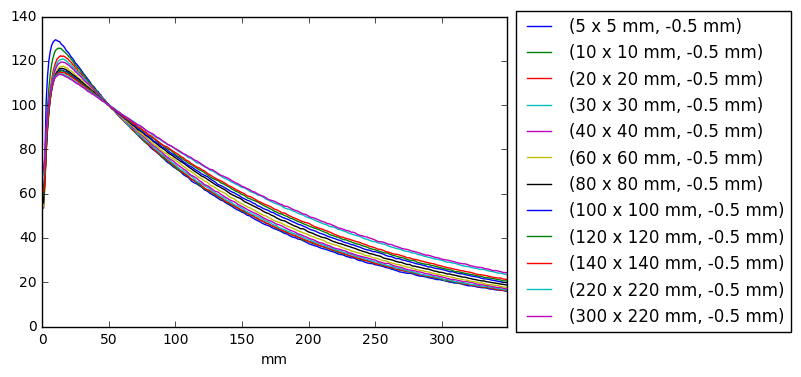

In [6]:
ax = PDD['Joined'].plot()

ax.set_xlabel('mm')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Analyse omnipro 10x10 cm PDD data 

first get the 10x10 pdd data. There are three columns, first and third are measured PDD, first is high resolution sampling (0.5mm step size, 15mm/s speed, 1s meas time, ), third is low resolution sampling (2mm step size, 15 or 20mm/s speed, 0.5s meas time), second is the interpolated data at 1mm step size

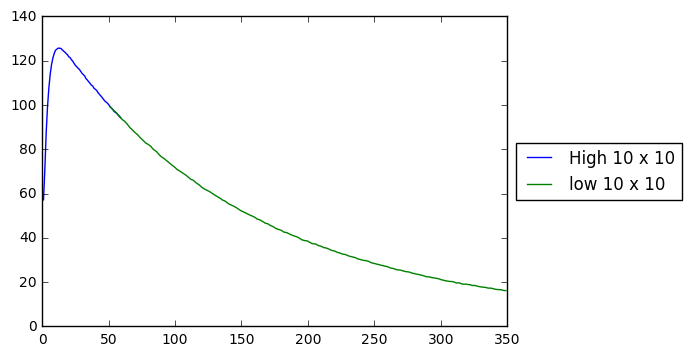

In [7]:
high10 = PDD['High']['10 x 10 mm']
low10 = PDD['Low']['10 x 10 mm']
joined10 = PDD['Joined']['10 x 10 mm']

plt.plot(high10, label = 'High 10 x 10')
plt.plot(low10, label = 'low 10 x 10')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Recreate the RESAMPLED trace.
Concat the two differently sampled data, sort on index, then interpolate on linear spacing

In [8]:
my_RESAMPLED = pd.concat([low10, high10], axis=0).sort_index()

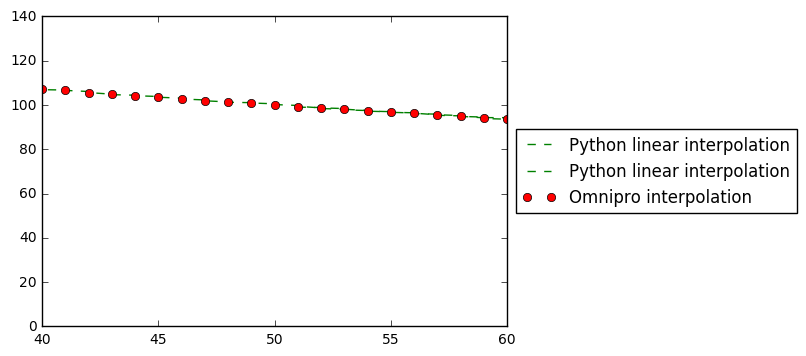

In [9]:
plt.plot(my_RESAMPLED.interpolate(method='linear'), color='green',  linestyle='--', label = 'Python linear interpolation')  
plt.plot(joined10, color='red', marker='o', linestyle='', label = 'Omnipro interpolation') ;  # Jamses resampled
plt.xlim( [40,60] ) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Now profile data

In [10]:
# pd.read_table('6MV 100FSD PROFILE (PDD JUNE - RAW).csv', sep= ",").ix[:8] # see raw header

In [11]:
PROFILE = pd.read_table('6MV 100FSD PROFILE (PDD JUNE - RAW).csv', sep= ",", index_col=0, header=[1,4,5], skiprows=[6]); # comma for csv
PROFILE.head()

Scan Type:        Crossline                       Inline                  
Fieldsize:       60 x 60 mm                   60 x 60 mm                  
Depth:              15.0 mm 100.0 mm 350.0 mm    15.0 mm 100.0 mm 350.0 mm
Coordinate [mm]:                                                          
-90                     NaN      NaN      1.3        NaN      NaN      1.3
-89                     NaN      NaN      1.2        NaN      NaN      1.3
-88                     NaN      NaN      1.2        NaN      NaN      1.2
-87                     NaN      NaN      1.2        NaN      NaN      1.3
-86                     NaN      NaN      1.4        NaN      NaN      1.3

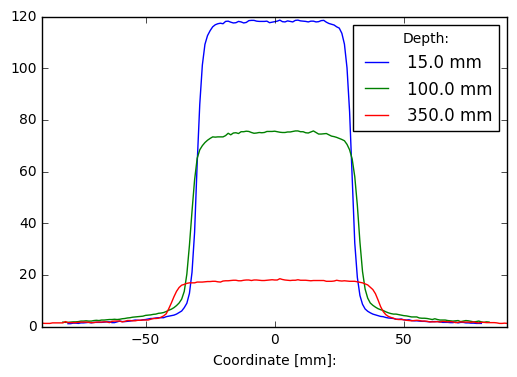

In [12]:
PROFILE['Crossline', '60 x 60 mm'].plot();